In [1]:
!pip install plotly==5.0.0

     |████████████████████████████████| 19.1MB 1.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


##**Importing Libraries**



In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import plotly.express as px
import seaborn as sns


## **Reading File**

In [3]:
gk=pd.read_csv('/content/drive/MyDrive/Highradius/H2HBABBA3051.csv')
gk

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200793513,KROGER corp,2019-10-25 00:00:00,2019.0,1.929997e+09,2019-10-10,20191010,20191010,20191025.0,USD,RV,1.0,NaN,21914.47,20191010.0,NAA8,1.929997e+09,0
1,U001,CCCA02,KRAFT associates,NaN,2020.0,1.930712e+09,2020-03-28,20200327,20200328,20200502.0,USD,RV,1.0,NaN,8019.84,20200328.0,NAG2,1.930712e+09,1
2,U001,0200735528,ASSOCIA in,2019-09-20 00:00:00,2019.0,1.929827e+09,2019-09-04,20190903,20190904,20190919.0,USD,RV,1.0,NaN,71770.45,20190904.0,NAA8,1.929827e+09,0
3,U001,100058011,SPLASH corp,2019-08-28 00:00:00,2019.0,1.929753e+09,2019-08-15,20190816,20190815,20190916.0,USD,RV,1.0,NaN,1618.96,20190815.0,NA32,1.929753e+09,0
4,U001,0200769623,WAL-MAR llc,2019-09-24 00:00:00,2019.0,1.929869e+09,2019-09-13,20190912,20190913,20190928.0,USD,RV,1.0,NaN,27723.33,20190913.0,NAH4,1.929869e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200759878,SA corp,NaN,2020.0,1.930670e+09,2020-03-20,20200318,20200320,20200404.0,USD,RV,1.0,NaN,13883.47,20200320.0,NAH4,1.930670e+09,1
49996,U001,0200148860,DOLLA in,2019-09-24 00:00:00,2019.0,1.929826e+09,2019-09-05,20190904,20190905,20191109.0,USD,RV,1.0,NaN,1375.39,20190905.0,NAGD,1.929826e+09,0
49997,U001,0200418007,AM us,2019-07-24 00:00:00,2019.0,1.929565e+09,2019-07-03,20190701,20190703,20190718.0,USD,RV,1.0,NaN,10707.03,20190703.0,NAA8,1.929565e+09,0
49998,U001,200769623,WAL-MAR llc,2019-08-27 00:00:00,2019.0,1.929739e+09,2019-08-15,20190813,20190815,20190830.0,USD,RV,1.0,NaN,14283.12,20190815.0,NAH4,1.929739e+09,0


## **Getting Familiar With Datatypes**

In [4]:
#Reading Total Rows and Total Columns
gk.shape

(50000, 19)

Getting to know our columns datatypes

In [5]:
gk.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [6]:
#changing document_create_date from int64 to str(object)
gk.document_create_date=gk.document_create_date.astype(str)
#changing buisness_year from float64 to int64
gk.buisness_year=gk.buisness_year.astype('int64')
gk.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year               int64
doc_id                    float64
posting_date               object
document_create_date       object
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

## **Checking Null Value**

Checking null in columns using function

In [7]:
havingnun=gk.isnull().sum()
havingnun[:]

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

**Dropping Column: It contains null value **

In [8]:

gk.drop(columns='area_business',inplace=True)
gk

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200793513,KROGER corp,2019-10-25 00:00:00,2019,1.929997e+09,2019-10-10,20191010,20191010,20191025.0,USD,RV,1.0,21914.47,20191010.0,NAA8,1.929997e+09,0
1,U001,CCCA02,KRAFT associates,NaN,2020,1.930712e+09,2020-03-28,20200327,20200328,20200502.0,USD,RV,1.0,8019.84,20200328.0,NAG2,1.930712e+09,1
2,U001,0200735528,ASSOCIA in,2019-09-20 00:00:00,2019,1.929827e+09,2019-09-04,20190903,20190904,20190919.0,USD,RV,1.0,71770.45,20190904.0,NAA8,1.929827e+09,0
3,U001,100058011,SPLASH corp,2019-08-28 00:00:00,2019,1.929753e+09,2019-08-15,20190816,20190815,20190916.0,USD,RV,1.0,1618.96,20190815.0,NA32,1.929753e+09,0
4,U001,0200769623,WAL-MAR llc,2019-09-24 00:00:00,2019,1.929869e+09,2019-09-13,20190912,20190913,20190928.0,USD,RV,1.0,27723.33,20190913.0,NAH4,1.929869e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200759878,SA corp,NaN,2020,1.930670e+09,2020-03-20,20200318,20200320,20200404.0,USD,RV,1.0,13883.47,20200320.0,NAH4,1.930670e+09,1
49996,U001,0200148860,DOLLA in,2019-09-24 00:00:00,2019,1.929826e+09,2019-09-05,20190904,20190905,20191109.0,USD,RV,1.0,1375.39,20190905.0,NAGD,1.929826e+09,0
49997,U001,0200418007,AM us,2019-07-24 00:00:00,2019,1.929565e+09,2019-07-03,20190701,20190703,20190718.0,USD,RV,1.0,10707.03,20190703.0,NAA8,1.929565e+09,0
49998,U001,200769623,WAL-MAR llc,2019-08-27 00:00:00,2019,1.929739e+09,2019-08-15,20190813,20190815,20190830.0,USD,RV,1.0,14283.12,20190815.0,NAH4,1.929739e+09,0


## **Converting To Datetime**

Converting our datatye of all date formats in datatime64[ns]

In [9]:
gk['due_in_date']=pd.to_datetime(gk['due_in_date'], format='%Y%m%d')
gk['document_create_date']=pd.to_datetime(gk['document_create_date'],format='%Y%m%d')
gk['document_create_date.1']=pd.to_datetime(gk['document_create_date.1'],format='%Y%m%d')
gk['baseline_create_date']=pd.to_datetime(gk['baseline_create_date'],format='%Y%m%d')
gk['posting_date']=pd.to_datetime(gk['posting_date'],format='%Y-%m-%d')
gk['clear_date']=pd.to_datetime(gk['clear_date'])
gk




,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200793513,KROGER corp,2019-10-25,2019,1.929997e+09,2019-10-10,2019-10-10,2019-10-10,2019-10-25,USD,RV,1.0,21914.47,2019-10-10,NAA8,1.929997e+09,0
1,U001,CCCA02,KRAFT associates,NaT,2020,1.930712e+09,2020-03-28,2020-03-27,2020-03-28,2020-05-02,USD,RV,1.0,8019.84,2020-03-28,NAG2,1.930712e+09,1
2,U001,0200735528,ASSOCIA in,2019-09-20,2019,1.929827e+09,2019-09-04,2019-09-03,2019-09-04,2019-09-19,USD,RV,1.0,71770.45,2019-09-04,NAA8,1.929827e+09,0
3,U001,100058011,SPLASH corp,2019-08-28,2019,1.929753e+09,2019-08-15,2019-08-16,2019-08-15,2019-09-16,USD,RV,1.0,1618.96,2019-08-15,NA32,1.929753e+09,0
4,U001,0200769623,WAL-MAR llc,2019-09-24,2019,1.929869e+09,2019-09-13,2019-09-12,2019-09-13,2019-09-28,USD,RV,1.0,27723.33,2019-09-13,NAH4,1.929869e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200759878,SA corp,NaT,2020,1.930670e+09,2020-03-20,2020-03-18,2020-03-20,2020-04-04,USD,RV,1.0,13883.47,2020-03-20,NAH4,1.930670e+09,1
49996,U001,0200148860,DOLLA in,2019-09-24,2019,1.929826e+09,2019-09-05,2019-09-04,2019-09-05,2019-11-09,USD,RV,1.0,1375.39,2019-09-05,NAGD,1.929826e+09,0
49997,U001,0200418007,AM us,2019-07-24,2019,1.929565e+09,2019-07-03,2019-07-01,2019-07-03,2019-07-18,USD,RV,1.0,10707.03,2019-07-03,NAA8,1.929565e+09,0
49998,U001,200769623,WAL-MAR llc,2019-08-27,2019,1.929739e+09,2019-08-15,2019-08-13,2019-08-15,2019-08-30,USD,RV,1.0,14283.12,2019-08-15,NAH4,1.929739e+09,0


In [10]:
gk.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

Encoding.........(Categorical Value)

In [11]:
le=LabelEncoder()

In [12]:
gk['document type']=le.fit_transform(gk['document type'])
gk['invoice_currency']=le.fit_transform(gk['invoice_currency'])
gk

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200793513,KROGER corp,2019-10-25,2019,1.929997e+09,2019-10-10,2019-10-10,2019-10-10,2019-10-25,1,0,1.0,21914.47,2019-10-10,NAA8,1.929997e+09,0
1,U001,CCCA02,KRAFT associates,NaT,2020,1.930712e+09,2020-03-28,2020-03-27,2020-03-28,2020-05-02,1,0,1.0,8019.84,2020-03-28,NAG2,1.930712e+09,1
2,U001,0200735528,ASSOCIA in,2019-09-20,2019,1.929827e+09,2019-09-04,2019-09-03,2019-09-04,2019-09-19,1,0,1.0,71770.45,2019-09-04,NAA8,1.929827e+09,0
3,U001,100058011,SPLASH corp,2019-08-28,2019,1.929753e+09,2019-08-15,2019-08-16,2019-08-15,2019-09-16,1,0,1.0,1618.96,2019-08-15,NA32,1.929753e+09,0
4,U001,0200769623,WAL-MAR llc,2019-09-24,2019,1.929869e+09,2019-09-13,2019-09-12,2019-09-13,2019-09-28,1,0,1.0,27723.33,2019-09-13,NAH4,1.929869e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200759878,SA corp,NaT,2020,1.930670e+09,2020-03-20,2020-03-18,2020-03-20,2020-04-04,1,0,1.0,13883.47,2020-03-20,NAH4,1.930670e+09,1
49996,U001,0200148860,DOLLA in,2019-09-24,2019,1.929826e+09,2019-09-05,2019-09-04,2019-09-05,2019-11-09,1,0,1.0,1375.39,2019-09-05,NAGD,1.929826e+09,0
49997,U001,0200418007,AM us,2019-07-24,2019,1.929565e+09,2019-07-03,2019-07-01,2019-07-03,2019-07-18,1,0,1.0,10707.03,2019-07-03,NAA8,1.929565e+09,0
49998,U001,200769623,WAL-MAR llc,2019-08-27,2019,1.929739e+09,2019-08-15,2019-08-13,2019-08-15,2019-08-30,1,0,1.0,14283.12,2019-08-15,NAH4,1.929739e+09,0


In [13]:
##Checking my encoding if done correctly
gk['document type'].nunique()


2

**Dropping Duplicates**

In [14]:
gk.drop_duplicates(subset='invoice_id',keep='first',inplace=True)

In [15]:
gk.drop(gk.loc[gk['invoice_id'].isnull()].index,inplace=True)
gk

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200793513,KROGER corp,2019-10-25,2019,1.929997e+09,2019-10-10,2019-10-10,2019-10-10,2019-10-25,1,0,1.0,21914.47,2019-10-10,NAA8,1.929997e+09,0
1,U001,CCCA02,KRAFT associates,NaT,2020,1.930712e+09,2020-03-28,2020-03-27,2020-03-28,2020-05-02,1,0,1.0,8019.84,2020-03-28,NAG2,1.930712e+09,1
2,U001,0200735528,ASSOCIA in,2019-09-20,2019,1.929827e+09,2019-09-04,2019-09-03,2019-09-04,2019-09-19,1,0,1.0,71770.45,2019-09-04,NAA8,1.929827e+09,0
3,U001,100058011,SPLASH corp,2019-08-28,2019,1.929753e+09,2019-08-15,2019-08-16,2019-08-15,2019-09-16,1,0,1.0,1618.96,2019-08-15,NA32,1.929753e+09,0
4,U001,0200769623,WAL-MAR llc,2019-09-24,2019,1.929869e+09,2019-09-13,2019-09-12,2019-09-13,2019-09-28,1,0,1.0,27723.33,2019-09-13,NAH4,1.929869e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200782669,SYGMA systems,NaT,2020,1.930582e+09,2020-02-28,2020-02-28,2020-02-28,2020-03-19,1,0,1.0,23458.67,2020-02-28,NAD1,1.930582e+09,1
49995,U001,0200759878,SA corp,NaT,2020,1.930670e+09,2020-03-20,2020-03-18,2020-03-20,2020-04-04,1,0,1.0,13883.47,2020-03-20,NAH4,1.930670e+09,1
49997,U001,0200418007,AM us,2019-07-24,2019,1.929565e+09,2019-07-03,2019-07-01,2019-07-03,2019-07-18,1,0,1.0,10707.03,2019-07-03,NAA8,1.929565e+09,0
49998,U001,200769623,WAL-MAR llc,2019-08-27,2019,1.929739e+09,2019-08-15,2019-08-13,2019-08-15,2019-08-30,1,0,1.0,14283.12,2019-08-15,NAH4,1.929739e+09,0


In [16]:
gk.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48860 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           48860 non-null  object        
 1   cust_number             48860 non-null  object        
 2   name_customer           48860 non-null  object        
 3   clear_date              39114 non-null  datetime64[ns]
 4   buisness_year           48860 non-null  int64         
 5   doc_id                  48860 non-null  float64       
 6   posting_date            48860 non-null  datetime64[ns]
 7   document_create_date    48860 non-null  datetime64[ns]
 8   document_create_date.1  48860 non-null  datetime64[ns]
 9   due_in_date             48860 non-null  datetime64[ns]
 10  invoice_currency        48860 non-null  int64         
 11  document type           48860 non-null  int64         
 12  posting_id              48860 non-null  float6

## **Data Splitting**

## **Training**

In [17]:
gk_train=gk[gk['isOpen'] == 0].reset_index(drop=True)

gk_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200793513,KROGER corp,2019-10-25,2019,1.929997e+09,2019-10-10,2019-10-10,2019-10-10,2019-10-25,1,0,1.0,21914.47,2019-10-10,NAA8,1.929997e+09,0
1,U001,0200735528,ASSOCIA in,2019-09-20,2019,1.929827e+09,2019-09-04,2019-09-03,2019-09-04,2019-09-19,1,0,1.0,71770.45,2019-09-04,NAA8,1.929827e+09,0
2,U001,100058011,SPLASH corp,2019-08-28,2019,1.929753e+09,2019-08-15,2019-08-16,2019-08-15,2019-09-16,1,0,1.0,1618.96,2019-08-15,NA32,1.929753e+09,0
3,U001,0200769623,WAL-MAR llc,2019-09-24,2019,1.929869e+09,2019-09-13,2019-09-12,2019-09-13,2019-09-28,1,0,1.0,27723.33,2019-09-13,NAH4,1.929869e+09,0
4,CA02,0140104409,LOB foundation,2019-08-02,2019,2.960565e+09,2019-07-15,2019-07-15,2019-07-15,2019-08-01,0,0,1.0,330258.47,2019-07-22,CA10,2.960565e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39109,U001,0140142846,MONDE us,2019-03-13,2019,1.928591e+09,2019-01-08,2019-01-08,2019-01-08,2019-03-09,1,0,1.0,56693.00,2019-01-08,NACB,1.928591e+09,0
39110,U001,0200780383,MEIJ co,2019-06-03,2019,1.929044e+09,2019-03-28,2019-03-28,2019-03-28,2019-06-01,1,0,1.0,10756.22,2019-03-28,NAGD,1.929044e+09,0
39111,U001,0200418007,AM us,2019-07-24,2019,1.929565e+09,2019-07-03,2019-07-01,2019-07-03,2019-07-18,1,0,1.0,10707.03,2019-07-03,NAA8,1.929565e+09,0
39112,U001,200769623,WAL-MAR llc,2019-08-27,2019,1.929739e+09,2019-08-15,2019-08-13,2019-08-15,2019-08-30,1,0,1.0,14283.12,2019-08-15,NAH4,1.929739e+09,0


**Calculating Delay in Date**

In [18]:
gk_train['Delay']=(gk_train['clear_date']-gk_train['due_in_date']).dt.days
gk_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,U001,0200793513,KROGER corp,2019-10-25,2019,1.929997e+09,2019-10-10,2019-10-10,2019-10-10,2019-10-25,1,0,1.0,21914.47,2019-10-10,NAA8,1.929997e+09,0,0
1,U001,0200735528,ASSOCIA in,2019-09-20,2019,1.929827e+09,2019-09-04,2019-09-03,2019-09-04,2019-09-19,1,0,1.0,71770.45,2019-09-04,NAA8,1.929827e+09,0,1
2,U001,100058011,SPLASH corp,2019-08-28,2019,1.929753e+09,2019-08-15,2019-08-16,2019-08-15,2019-09-16,1,0,1.0,1618.96,2019-08-15,NA32,1.929753e+09,0,-19
3,U001,0200769623,WAL-MAR llc,2019-09-24,2019,1.929869e+09,2019-09-13,2019-09-12,2019-09-13,2019-09-28,1,0,1.0,27723.33,2019-09-13,NAH4,1.929869e+09,0,-4
4,CA02,0140104409,LOB foundation,2019-08-02,2019,2.960565e+09,2019-07-15,2019-07-15,2019-07-15,2019-08-01,0,0,1.0,330258.47,2019-07-22,CA10,2.960565e+09,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39109,U001,0140142846,MONDE us,2019-03-13,2019,1.928591e+09,2019-01-08,2019-01-08,2019-01-08,2019-03-09,1,0,1.0,56693.00,2019-01-08,NACB,1.928591e+09,0,4
39110,U001,0200780383,MEIJ co,2019-06-03,2019,1.929044e+09,2019-03-28,2019-03-28,2019-03-28,2019-06-01,1,0,1.0,10756.22,2019-03-28,NAGD,1.929044e+09,0,2
39111,U001,0200418007,AM us,2019-07-24,2019,1.929565e+09,2019-07-03,2019-07-01,2019-07-03,2019-07-18,1,0,1.0,10707.03,2019-07-03,NAA8,1.929565e+09,0,6
39112,U001,200769623,WAL-MAR llc,2019-08-27,2019,1.929739e+09,2019-08-15,2019-08-13,2019-08-15,2019-08-30,1,0,1.0,14283.12,2019-08-15,NAH4,1.929739e+09,0,-3


**Dropping Unnecessary Columns**

In [19]:
gk_train.drop(columns=['posting_id','isOpen'],inplace=True) #contains the same value
gk_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay
0,U001,0200793513,KROGER corp,2019-10-25,2019,1.929997e+09,2019-10-10,2019-10-10,2019-10-10,2019-10-25,1,0,21914.47,2019-10-10,NAA8,1.929997e+09,0
1,U001,0200735528,ASSOCIA in,2019-09-20,2019,1.929827e+09,2019-09-04,2019-09-03,2019-09-04,2019-09-19,1,0,71770.45,2019-09-04,NAA8,1.929827e+09,1
2,U001,100058011,SPLASH corp,2019-08-28,2019,1.929753e+09,2019-08-15,2019-08-16,2019-08-15,2019-09-16,1,0,1618.96,2019-08-15,NA32,1.929753e+09,-19
3,U001,0200769623,WAL-MAR llc,2019-09-24,2019,1.929869e+09,2019-09-13,2019-09-12,2019-09-13,2019-09-28,1,0,27723.33,2019-09-13,NAH4,1.929869e+09,-4
4,CA02,0140104409,LOB foundation,2019-08-02,2019,2.960565e+09,2019-07-15,2019-07-15,2019-07-15,2019-08-01,0,0,330258.47,2019-07-22,CA10,2.960565e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39109,U001,0140142846,MONDE us,2019-03-13,2019,1.928591e+09,2019-01-08,2019-01-08,2019-01-08,2019-03-09,1,0,56693.00,2019-01-08,NACB,1.928591e+09,4
39110,U001,0200780383,MEIJ co,2019-06-03,2019,1.929044e+09,2019-03-28,2019-03-28,2019-03-28,2019-06-01,1,0,10756.22,2019-03-28,NAGD,1.929044e+09,2
39111,U001,0200418007,AM us,2019-07-24,2019,1.929565e+09,2019-07-03,2019-07-01,2019-07-03,2019-07-18,1,0,10707.03,2019-07-03,NAA8,1.929565e+09,6
39112,U001,200769623,WAL-MAR llc,2019-08-27,2019,1.929739e+09,2019-08-15,2019-08-13,2019-08-15,2019-08-30,1,0,14283.12,2019-08-15,NAH4,1.929739e+09,-3


In [20]:
#sorting index
gk_train.sort_values(by='posting_date',inplace=True)
gk_train.reset_index(drop=True,inplace=True)
gk_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay
0,U001,0200772595,SAFEW trust,2019-01-14,2019,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,0,84827.34,2018-12-30,NAA8,1.928543e+09,0
1,U001,0200794332,COST co,2019-01-16,2019,1.928532e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,0,1824.84,2018-12-30,NAAX,1.928532e+09,2
2,U001,0200769623,WAL-MAR us,2019-01-09,2019,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,0,37766.27,2018-12-30,NAH4,1.928538e+09,-5
3,U001,0200744019,TARG co,2019-01-18,2019,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,0,53110.54,2018-12-30,NAA8,1.928542e+09,4
4,U001,0200799367,MCL systems,2019-01-14,2019,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,0,93297.94,2018-12-30,NAA8,1.928541e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39109,U001,0200739044,PERFOR corporation,2020-03-16,2020,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,0,25143.02,2020-02-27,NAA8,1.930574e+09,3
39110,U001,0200571849,US llc,2020-03-13,2020,1.930580e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,0,44063.16,2020-02-27,NAA8,1.930580e+09,0
39111,CA02,0140106372,G T corp,2020-03-13,2020,2.960614e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-09,0,0,4511.91,2020-02-28,CA10,2.960614e+09,4
39112,U001,0200759878,SA in,2020-03-16,2020,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,0,13750.69,2020-02-27,NAH4,1.930577e+09,3


### **Test**

In [21]:
gk_test=gk[gk['isOpen'] == 1].reset_index(drop=True)
gk_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCCA02,KRAFT associates,NaT,2020,1.930712e+09,2020-03-28,2020-03-27,2020-03-28,2020-05-02,1,0,1.0,8019.84,2020-03-28,NAG2,1.930712e+09,1
1,CA02,140104440,SO corp,NaT,2020,2.960621e+09,2020-03-14,2020-03-14,2020-03-14,2020-03-24,0,0,1.0,107400.90,2020-03-14,CA10,2.960621e+09,1
2,U001,0200769623,WAL-MAR trust,NaT,2020,1.930818e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,22224.38,2020-04-23,NAH4,1.930818e+09,1
3,U001,0200769623,WAL-MAR corporation,NaT,2020,1.930725e+09,2020-04-01,2020-03-31,2020-04-01,2020-04-16,1,0,1.0,8127.49,2020-04-01,NAH4,1.930725e+09,1
4,U001,0200763814,SYSCO F systems,NaT,2020,1.930821e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,4114.37,2020-04-23,NAA8,1.930821e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,U001,0200148860,DOLLA,NaT,2020,1.930580e+09,2020-02-29,2020-02-27,2020-02-29,2020-03-15,1,0,1.0,14610.98,2020-02-29,NAA8,1.930580e+09,1
9742,U001,0200793830,M corporation,NaT,2020,1.930702e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,1,0,1.0,18479.62,2020-03-25,NAA8,1.930702e+09,1
9743,U001,0200752302,KROGER us,NaT,2020,1.930621e+09,2020-03-09,2020-03-07,2020-03-09,2020-03-24,1,0,1.0,16475.65,2020-03-09,NAA8,1.930621e+09,1
9744,U001,0200782669,SYGMA systems,NaT,2020,1.930582e+09,2020-02-28,2020-02-28,2020-02-28,2020-03-19,1,0,1.0,23458.67,2020-02-28,NAD1,1.930582e+09,1


# **EDA:- Exploratory data analysis**

**Creating Co-Relation Matrix**:- To get relation amongst the data

In [22]:
gk_corr=gk_train.corr()
gk_corr

,buisness_year,doc_id,invoice_currency,document type,total_open_amount,invoice_id,Delay
buisness_year,1.000000,-0.002348,0.003744,NaN,-0.008437,-0.002348,-0.007220
doc_id,-0.002348,1.000000,-0.999614,NaN,0.187485,1.000000,0.144686
invoice_currency,0.003744,-0.999614,1.000000,NaN,-0.188113,-0.999614,-0.142245
document type,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-0.008437,0.187485,-0.188113,NaN,1.000000,0.187485,0.012594
invoice_id,-0.002348,1.000000,-0.999614,NaN,0.187485,1.000000,0.144686
Delay,-0.007220,0.144686,-0.142245,NaN,0.012594,0.144686,1.000000


In [23]:
## It contains same type value
gk_train.drop(columns=['document type'],inplace=True)

In [24]:
gk_corr=gk_train.corr()
gk_corr

,buisness_year,doc_id,invoice_currency,total_open_amount,invoice_id,Delay
buisness_year,1.000000,-0.002348,0.003744,-0.008437,-0.002348,-0.007220
doc_id,-0.002348,1.000000,-0.999614,0.187485,1.000000,0.144686
invoice_currency,0.003744,-0.999614,1.000000,-0.188113,-0.999614,-0.142245
total_open_amount,-0.008437,0.187485,-0.188113,1.000000,0.187485,0.012594
invoice_id,-0.002348,1.000000,-0.999614,0.187485,1.000000,0.144686
Delay,-0.007220,0.144686,-0.142245,0.012594,0.144686,1.000000


In [25]:
gk1=gk_train.groupby(['buisness_year'])['total_open_amount'].sum().sort_values(ascending=False)
gk1

buisness_year
2019    1.098575e+09
2020    1.593050e+08
Name: total_open_amount, dtype: float64

In [26]:
gk1.index

Int64Index([2019, 2020], dtype='int64', name='buisness_year')

In [27]:
gk1.values

array([1.09857508e+09, 1.59305022e+08])

**GETTING THE INSIGHTS OF YEARS IN WHICH TRANSACTION IS MORE**

In [28]:
fig = px.bar(x=gk1.index, y=gk1.values,orientation='v',title='Total Transaction Year')
fig.show()

**CREATING HEATMAP AMONGST THE COLUMNS DATA ARE RELATED**

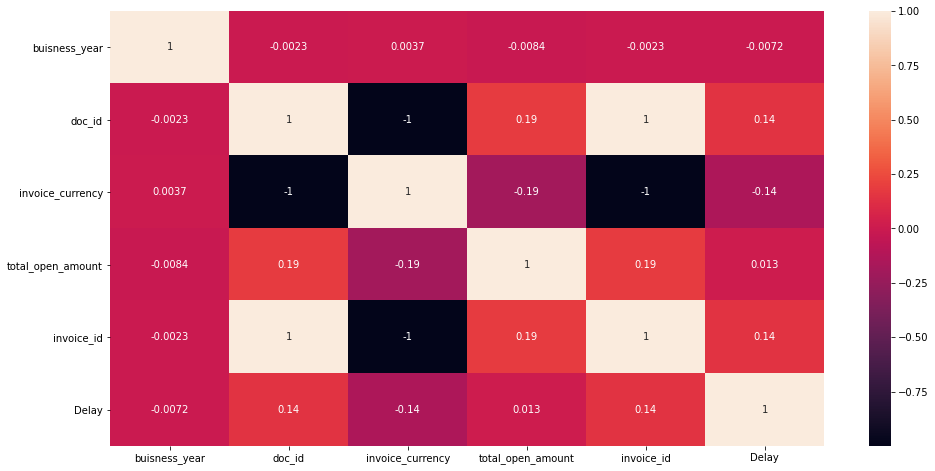

In [29]:
plt.figure(figsize=(16,8))
sns.heatmap(gk_corr,annot=True)


**BAR PLOT FOR BUSINESS CODE**

###In comparison to the others, U001 is responsible for the majority of the buisness.

In [30]:
b_c=gk['business_code'].value_counts()
fig=px.bar(x=b_c.index,y=b_c.values)
fig.show()

**DISTRIBUTION PLOT FOR DOC ID**

######DOC ID INSIGHTS GIVES US THE OVERVIEW OF DOC ID IN BETWEEN 1.8 AND 2.0 ,IN WHICH TOTAL OPEN AMOUNT WILL BE MORE.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



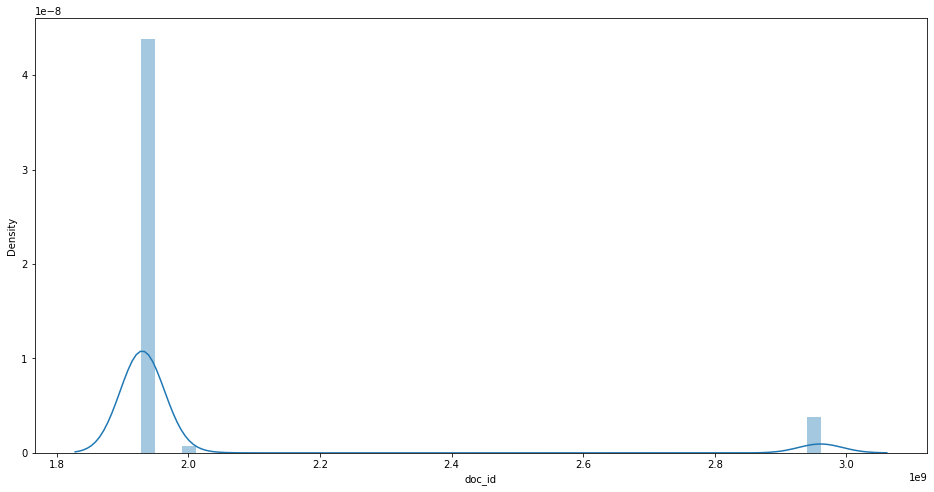

In [31]:
plt.figure(figsize=(16,8))
sns.distplot(gk_train['doc_id'])


**HISTOGRAM FOR TOTAL OPEN AMOUNT**

It shows that majority of the count are in te first block 

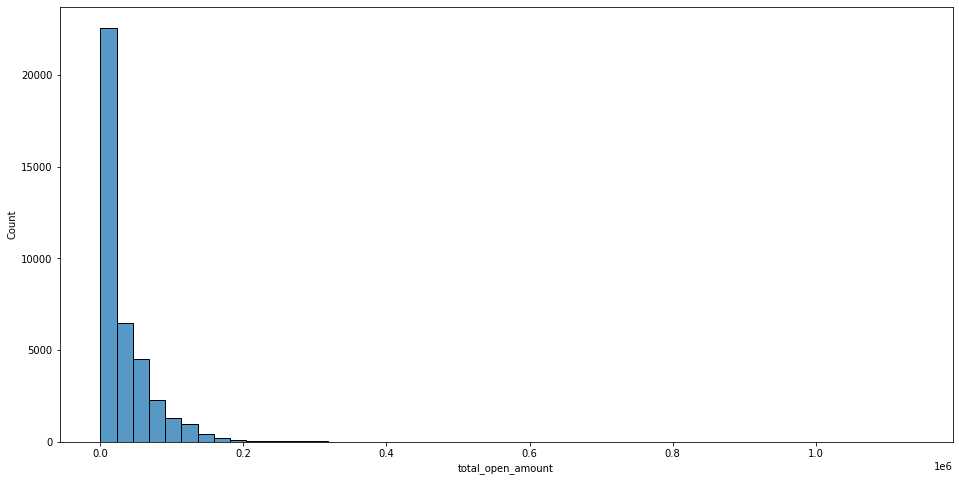

In [32]:
plt.figure(figsize=(16,8))
sns.histplot(gk_train['total_open_amount'],bins=50)

**BOXPLOT FOR TOTAL OPEN AMOUNT**

It tells us the insights about outliers

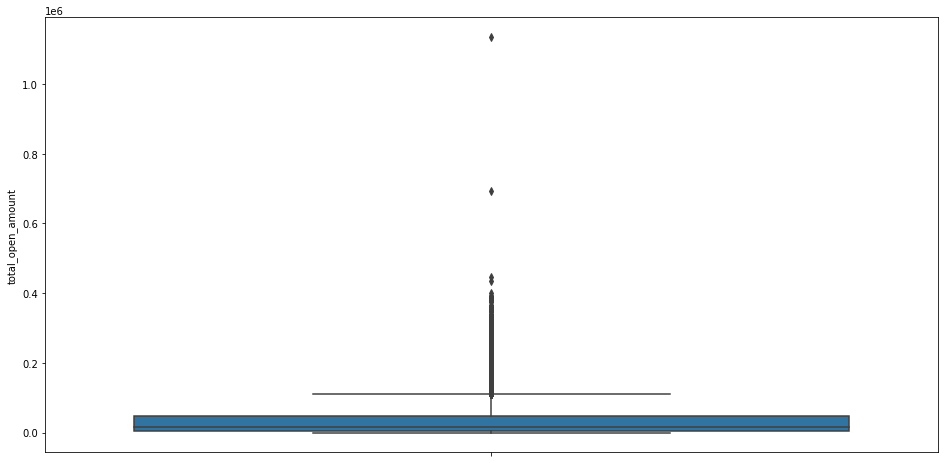

In [33]:
plt.figure(figsize=(16,8))
sns.boxplot( y="total_open_amount", data=gk_train)


** HISTOGRAM OF TOTAL OPEN AMOUNT**

It demonstrates that the majority of large-amount transactions are insignificant when compared to small-amount transactions.

In [34]:
fig=px.histogram(x=gk_train['total_open_amount'])
fig.show()

In [35]:
##retransforming it to get graph insights
gk_train['invoice_currency']=le.inverse_transform(gk_train['invoice_currency'])
gk_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay
0,U001,0200772595,SAFEW trust,2019-01-14,2019,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,1.928543e+09,0
1,U001,0200794332,COST co,2019-01-16,2019,1.928532e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,1824.84,2018-12-30,NAAX,1.928532e+09,2
2,U001,0200769623,WAL-MAR us,2019-01-09,2019,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,37766.27,2018-12-30,NAH4,1.928538e+09,-5
3,U001,0200744019,TARG co,2019-01-18,2019,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,53110.54,2018-12-30,NAA8,1.928542e+09,4
4,U001,0200799367,MCL systems,2019-01-14,2019,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,93297.94,2018-12-30,NAA8,1.928541e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39109,U001,0200739044,PERFOR corporation,2020-03-16,2020,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,25143.02,2020-02-27,NAA8,1.930574e+09,3
39110,U001,0200571849,US llc,2020-03-13,2020,1.930580e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,44063.16,2020-02-27,NAA8,1.930580e+09,0
39111,CA02,0140106372,G T corp,2020-03-13,2020,2.960614e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-09,CAD,4511.91,2020-02-28,CA10,2.960614e+09,4
39112,U001,0200759878,SA in,2020-03-16,2020,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,13750.69,2020-02-27,NAH4,1.930577e+09,3


**INVOICE CURRENCY FREQUENCY**

IT DISCUSSES THE AMOUNT OF TRANSACTION IN DISTINCT CURRENCY TYPES.

In [36]:
i_c=gk_train['invoice_currency'].value_counts()
fig=px.bar(x=i_c.index,y=i_c.values, color=i_c.values)
fig.show()
           

**PIE CHART OF BUSINESS CODE**

The Pie Chart Gives Us The Businesses That Fall Under The U001 Code Are More Numerous Than Others.

In [37]:
fig=px.pie(names=gk_train['business_code'].value_counts().index,values=gk_train['business_code'].value_counts().values,title='BUSINESS CODE')
fig.show()

**SUNBURST GRAPH**

It informs us about which currency's client payment terms are more favourable throughout a specific year.

In [38]:

fig=px.sunburst(gk_train,path=['buisness_year','invoice_currency','cust_payment_terms'],values='total_open_amount')
fig.show()

**BAR PLOT OF Frequently Visited Businesses**

It reveals that Walmart client categories are more abundant than other customer categories.

In [39]:
n_c=gk_train['name_customer'].value_counts()[:70]
fig=px.bar(x=n_c.index,y=n_c.values,color=n_c.values)
fig.show()


In [40]:
##transforming it again from categorical value
gk_train['business_code']=le.fit_transform(gk_train['business_code'])
gk_train['invoice_currency']=le.fit_transform(gk_train['invoice_currency'])
gk_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay
0,1,0200772595,SAFEW trust,2019-01-14,2019,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,84827.34,2018-12-30,NAA8,1.928543e+09,0
1,1,0200794332,COST co,2019-01-16,2019,1.928532e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,1824.84,2018-12-30,NAAX,1.928532e+09,2
2,1,0200769623,WAL-MAR us,2019-01-09,2019,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,37766.27,2018-12-30,NAH4,1.928538e+09,-5
3,1,0200744019,TARG co,2019-01-18,2019,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,53110.54,2018-12-30,NAA8,1.928542e+09,4
4,1,0200799367,MCL systems,2019-01-14,2019,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,93297.94,2018-12-30,NAA8,1.928541e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39109,1,0200739044,PERFOR corporation,2020-03-16,2020,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,25143.02,2020-02-27,NAA8,1.930574e+09,3
39110,1,0200571849,US llc,2020-03-13,2020,1.930580e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,44063.16,2020-02-27,NAA8,1.930580e+09,0
39111,0,0140106372,G T corp,2020-03-13,2020,2.960614e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-09,0,4511.91,2020-02-28,CA10,2.960614e+09,4
39112,1,0200759878,SA in,2020-03-16,2020,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,13750.69,2020-02-27,NAH4,1.930577e+09,3


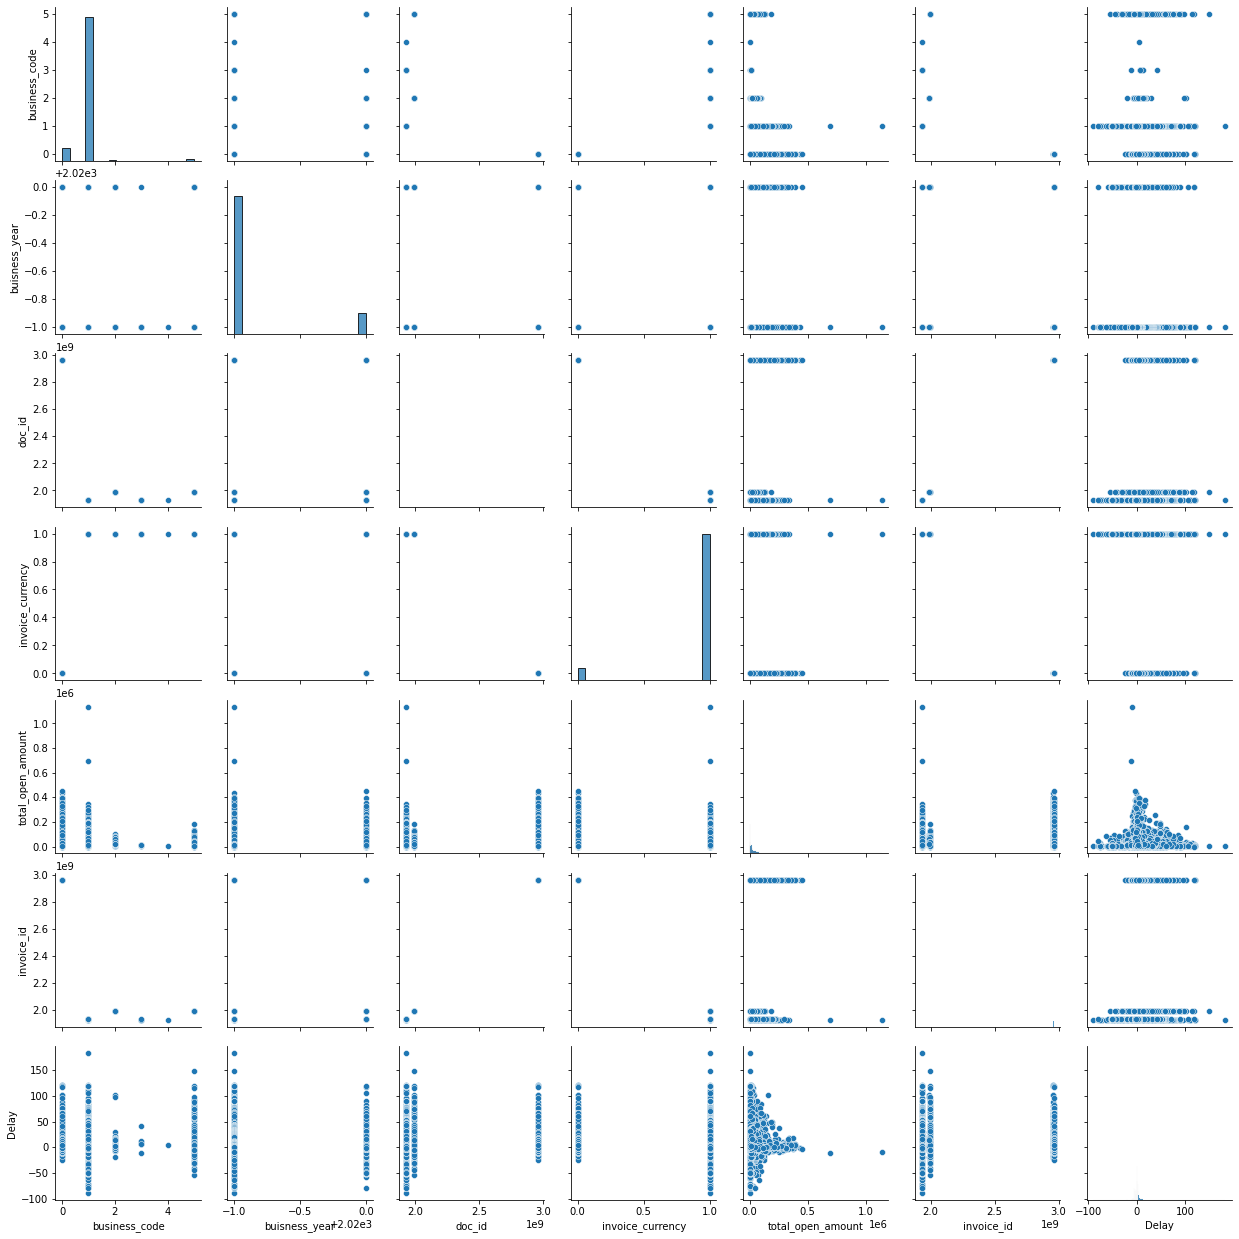

In [41]:
sns.pairplot(gk_train)

### **TEST TRAIN SPLIT**

In [42]:
gk_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay
0,1,0200772595,SAFEW trust,2019-01-14,2019,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,84827.34,2018-12-30,NAA8,1.928543e+09,0
1,1,0200794332,COST co,2019-01-16,2019,1.928532e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,1824.84,2018-12-30,NAAX,1.928532e+09,2
2,1,0200769623,WAL-MAR us,2019-01-09,2019,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,37766.27,2018-12-30,NAH4,1.928538e+09,-5
3,1,0200744019,TARG co,2019-01-18,2019,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,53110.54,2018-12-30,NAA8,1.928542e+09,4
4,1,0200799367,MCL systems,2019-01-14,2019,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,93297.94,2018-12-30,NAA8,1.928541e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39109,1,0200739044,PERFOR corporation,2020-03-16,2020,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,1,25143.02,2020-02-27,NAA8,1.930574e+09,3
39110,1,0200571849,US llc,2020-03-13,2020,1.930580e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,44063.16,2020-02-27,NAA8,1.930580e+09,0
39111,0,0140106372,G T corp,2020-03-13,2020,2.960614e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-09,0,4511.91,2020-02-28,CA10,2.960614e+09,4
39112,1,0200759878,SA in,2020-03-16,2020,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,1,13750.69,2020-02-27,NAH4,1.930577e+09,3


In [43]:
gk_train['business_code']=le.fit_transform(gk_train['business_code'])


In [44]:
gk_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id', 'Delay'],
      dtype='object')

In [45]:
gk_train.drop(['cust_number', 'name_customer', 'clear_date',
        'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date',
        'baseline_create_date',
       'cust_payment_terms', 'invoice_id'], axis =1, inplace=True)


In [46]:
gk_train #checking my columns

,business_code,buisness_year,invoice_currency,total_open_amount,Delay
0,1,2019,1,84827.34,0
1,1,2019,1,1824.84,2
2,1,2019,1,37766.27,-5
3,1,2019,1,53110.54,4
4,1,2019,1,93297.94,0
...,...,...,...,...,...
39109,1,2020,1,25143.02,3
39110,1,2020,1,44063.16,0
39111,0,2020,0,4511.91,4
39112,1,2020,1,13750.69,3


In [47]:
x=gk_train.iloc[:,:-1]
y=gk_train.iloc[:,-1]

In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x , y , test_size=0.2, random_state=0)

# **MODEL FIT**

Using Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
rfgk=RandomForestRegressor(n_estimators=300)
rfgk.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [50]:
rfgk_pred=rfgk.predict(xtest)

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2rfgk=r2_score(ytest, rfgk_pred)
r2rfgk

-0.33155610510080336

In [52]:
merfgk=mean_absolute_error(ytest,rfgk_pred)
merfgk

6.086473844140665

In [53]:
mserfgk=mean_squared_error(ytest, rfgk_pred)
mserfgk

151.2173656102524

## **PREPROCESSING OF PLOT**

In [54]:
gk_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCCA02,KRAFT associates,NaT,2020,1.930712e+09,2020-03-28,2020-03-27,2020-03-28,2020-05-02,1,0,1.0,8019.84,2020-03-28,NAG2,1.930712e+09,1
1,CA02,140104440,SO corp,NaT,2020,2.960621e+09,2020-03-14,2020-03-14,2020-03-14,2020-03-24,0,0,1.0,107400.90,2020-03-14,CA10,2.960621e+09,1
2,U001,0200769623,WAL-MAR trust,NaT,2020,1.930818e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,22224.38,2020-04-23,NAH4,1.930818e+09,1
3,U001,0200769623,WAL-MAR corporation,NaT,2020,1.930725e+09,2020-04-01,2020-03-31,2020-04-01,2020-04-16,1,0,1.0,8127.49,2020-04-01,NAH4,1.930725e+09,1
4,U001,0200763814,SYSCO F systems,NaT,2020,1.930821e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,4114.37,2020-04-23,NAA8,1.930821e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,U001,0200148860,DOLLA,NaT,2020,1.930580e+09,2020-02-29,2020-02-27,2020-02-29,2020-03-15,1,0,1.0,14610.98,2020-02-29,NAA8,1.930580e+09,1
9742,U001,0200793830,M corporation,NaT,2020,1.930702e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,1,0,1.0,18479.62,2020-03-25,NAA8,1.930702e+09,1
9743,U001,0200752302,KROGER us,NaT,2020,1.930621e+09,2020-03-09,2020-03-07,2020-03-09,2020-03-24,1,0,1.0,16475.65,2020-03-09,NAA8,1.930621e+09,1
9744,U001,0200782669,SYGMA systems,NaT,2020,1.930582e+09,2020-02-28,2020-02-28,2020-02-28,2020-03-19,1,0,1.0,23458.67,2020-02-28,NAD1,1.930582e+09,1


CREATING DEEP COPY

In [55]:
gk_test1=gk_test.copy(deep=True)
gk_test1


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCCA02,KRAFT associates,NaT,2020,1.930712e+09,2020-03-28,2020-03-27,2020-03-28,2020-05-02,1,0,1.0,8019.84,2020-03-28,NAG2,1.930712e+09,1
1,CA02,140104440,SO corp,NaT,2020,2.960621e+09,2020-03-14,2020-03-14,2020-03-14,2020-03-24,0,0,1.0,107400.90,2020-03-14,CA10,2.960621e+09,1
2,U001,0200769623,WAL-MAR trust,NaT,2020,1.930818e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,22224.38,2020-04-23,NAH4,1.930818e+09,1
3,U001,0200769623,WAL-MAR corporation,NaT,2020,1.930725e+09,2020-04-01,2020-03-31,2020-04-01,2020-04-16,1,0,1.0,8127.49,2020-04-01,NAH4,1.930725e+09,1
4,U001,0200763814,SYSCO F systems,NaT,2020,1.930821e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,4114.37,2020-04-23,NAA8,1.930821e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,U001,0200148860,DOLLA,NaT,2020,1.930580e+09,2020-02-29,2020-02-27,2020-02-29,2020-03-15,1,0,1.0,14610.98,2020-02-29,NAA8,1.930580e+09,1
9742,U001,0200793830,M corporation,NaT,2020,1.930702e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,1,0,1.0,18479.62,2020-03-25,NAA8,1.930702e+09,1
9743,U001,0200752302,KROGER us,NaT,2020,1.930621e+09,2020-03-09,2020-03-07,2020-03-09,2020-03-24,1,0,1.0,16475.65,2020-03-09,NAA8,1.930621e+09,1
9744,U001,0200782669,SYGMA systems,NaT,2020,1.930582e+09,2020-02-28,2020-02-28,2020-02-28,2020-03-19,1,0,1.0,23458.67,2020-02-28,NAD1,1.930582e+09,1


**CALLING TO KNOW WHAT COLUMNS WE DROPPED IN OUR TRAINING DATASET**

In [56]:
gk_train.head()


,business_code,buisness_year,invoice_currency,total_open_amount,Delay
0,1,2019,1,84827.34,0
1,1,2019,1,1824.84,2
2,1,2019,1,37766.27,-5
3,1,2019,1,53110.54,4
4,1,2019,1,93297.94,0


In [57]:
gk_test1.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

**Dropping Columns**:- That are not required

In [58]:
gk_test1.drop(['cust_number', 'name_customer', 'clear_date',
       'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date',
       'posting_id','baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],axis=1, inplace=True)

In [59]:
gk_test1

,business_code,buisness_year,invoice_currency,document type,total_open_amount
0,U001,2020,1,0,8019.84
1,CA02,2020,0,0,107400.90
2,U001,2020,1,0,22224.38
3,U001,2020,1,0,8127.49
4,U001,2020,1,0,4114.37
...,...,...,...,...,...
9741,U001,2020,1,0,14610.98
9742,U001,2020,1,0,18479.62
9743,U001,2020,1,0,16475.65
9744,U001,2020,1,0,23458.67


**ENCODING**:- encoding my business_code to get a categorical value

In [60]:
gk_test1['business_code']=le.fit_transform(gk_test1['business_code'])


In [61]:
gk_test1.drop(columns=['document type'],inplace=True)

In [62]:
gk_test1

,business_code,buisness_year,invoice_currency,total_open_amount
0,1,2020,1,8019.84
1,0,2020,0,107400.90
2,1,2020,1,22224.38
3,1,2020,1,8127.49
4,1,2020,1,4114.37
...,...,...,...,...
9741,1,2020,1,14610.98
9742,1,2020,1,18479.62
9743,1,2020,1,16475.65
9744,1,2020,1,23458.67


Predicting our delay

In [63]:
dly=rfgk.predict(gk_test1)

In [64]:
gk_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCCA02,KRAFT associates,NaT,2020,1.930712e+09,2020-03-28,2020-03-27,2020-03-28,2020-05-02,1,0,1.0,8019.84,2020-03-28,NAG2,1.930712e+09,1
1,CA02,140104440,SO corp,NaT,2020,2.960621e+09,2020-03-14,2020-03-14,2020-03-14,2020-03-24,0,0,1.0,107400.90,2020-03-14,CA10,2.960621e+09,1
2,U001,0200769623,WAL-MAR trust,NaT,2020,1.930818e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,22224.38,2020-04-23,NAH4,1.930818e+09,1
3,U001,0200769623,WAL-MAR corporation,NaT,2020,1.930725e+09,2020-04-01,2020-03-31,2020-04-01,2020-04-16,1,0,1.0,8127.49,2020-04-01,NAH4,1.930725e+09,1
4,U001,0200763814,SYSCO F systems,NaT,2020,1.930821e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,4114.37,2020-04-23,NAA8,1.930821e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,U001,0200148860,DOLLA,NaT,2020,1.930580e+09,2020-02-29,2020-02-27,2020-02-29,2020-03-15,1,0,1.0,14610.98,2020-02-29,NAA8,1.930580e+09,1
9742,U001,0200793830,M corporation,NaT,2020,1.930702e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,1,0,1.0,18479.62,2020-03-25,NAA8,1.930702e+09,1
9743,U001,0200752302,KROGER us,NaT,2020,1.930621e+09,2020-03-09,2020-03-07,2020-03-09,2020-03-24,1,0,1.0,16475.65,2020-03-09,NAA8,1.930621e+09,1
9744,U001,0200782669,SYGMA systems,NaT,2020,1.930582e+09,2020-02-28,2020-02-28,2020-02-28,2020-03-19,1,0,1.0,23458.67,2020-02-28,NAD1,1.930582e+09,1


Rounding Off To Nearest Day 

In [65]:
for i in range(len(dly)):
  dly[i]=np.round(dly[i])


In [66]:
gk_test['Delay']=dly
gk_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,U001,CCCA02,KRAFT associates,NaT,2020,1.930712e+09,2020-03-28,2020-03-27,2020-03-28,2020-05-02,1,0,1.0,8019.84,2020-03-28,NAG2,1.930712e+09,1,7.0
1,CA02,140104440,SO corp,NaT,2020,2.960621e+09,2020-03-14,2020-03-14,2020-03-14,2020-03-24,0,0,1.0,107400.90,2020-03-14,CA10,2.960621e+09,1,5.0
2,U001,0200769623,WAL-MAR trust,NaT,2020,1.930818e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,22224.38,2020-04-23,NAH4,1.930818e+09,1,-4.0
3,U001,0200769623,WAL-MAR corporation,NaT,2020,1.930725e+09,2020-04-01,2020-03-31,2020-04-01,2020-04-16,1,0,1.0,8127.49,2020-04-01,NAH4,1.930725e+09,1,-1.0
4,U001,0200763814,SYSCO F systems,NaT,2020,1.930821e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,4114.37,2020-04-23,NAA8,1.930821e+09,1,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,U001,0200148860,DOLLA,NaT,2020,1.930580e+09,2020-02-29,2020-02-27,2020-02-29,2020-03-15,1,0,1.0,14610.98,2020-02-29,NAA8,1.930580e+09,1,-5.0
9742,U001,0200793830,M corporation,NaT,2020,1.930702e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,1,0,1.0,18479.62,2020-03-25,NAA8,1.930702e+09,1,2.0
9743,U001,0200752302,KROGER us,NaT,2020,1.930621e+09,2020-03-09,2020-03-07,2020-03-09,2020-03-24,1,0,1.0,16475.65,2020-03-09,NAA8,1.930621e+09,1,1.0
9744,U001,0200782669,SYGMA systems,NaT,2020,1.930582e+09,2020-02-28,2020-02-28,2020-02-28,2020-03-19,1,0,1.0,23458.67,2020-02-28,NAD1,1.930582e+09,1,6.0


Changing our datatype from float to int64

In [67]:
gk_test['Delay']=gk_test['Delay'].astype('int64')

In [68]:
gk_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,U001,CCCA02,KRAFT associates,NaT,2020,1.930712e+09,2020-03-28,2020-03-27,2020-03-28,2020-05-02,1,0,1.0,8019.84,2020-03-28,NAG2,1.930712e+09,1,7
1,CA02,140104440,SO corp,NaT,2020,2.960621e+09,2020-03-14,2020-03-14,2020-03-14,2020-03-24,0,0,1.0,107400.90,2020-03-14,CA10,2.960621e+09,1,5
2,U001,0200769623,WAL-MAR trust,NaT,2020,1.930818e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,22224.38,2020-04-23,NAH4,1.930818e+09,1,-4
3,U001,0200769623,WAL-MAR corporation,NaT,2020,1.930725e+09,2020-04-01,2020-03-31,2020-04-01,2020-04-16,1,0,1.0,8127.49,2020-04-01,NAH4,1.930725e+09,1,-1
4,U001,0200763814,SYSCO F systems,NaT,2020,1.930821e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,4114.37,2020-04-23,NAA8,1.930821e+09,1,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,U001,0200148860,DOLLA,NaT,2020,1.930580e+09,2020-02-29,2020-02-27,2020-02-29,2020-03-15,1,0,1.0,14610.98,2020-02-29,NAA8,1.930580e+09,1,-5
9742,U001,0200793830,M corporation,NaT,2020,1.930702e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,1,0,1.0,18479.62,2020-03-25,NAA8,1.930702e+09,1,2
9743,U001,0200752302,KROGER us,NaT,2020,1.930621e+09,2020-03-09,2020-03-07,2020-03-09,2020-03-24,1,0,1.0,16475.65,2020-03-09,NAA8,1.930621e+09,1,1
9744,U001,0200782669,SYGMA systems,NaT,2020,1.930582e+09,2020-02-28,2020-02-28,2020-02-28,2020-03-19,1,0,1.0,23458.67,2020-02-28,NAD1,1.930582e+09,1,6


Importing timedelta function get final date

In [69]:
from datetime import timedelta,date
def fnldt(de,dedt):  #finaldate(fnldt)
    fn=[]
    for i,j in zip(de,dedt):
        fn.append(i+timedelta(days=j))
    return fn

In [70]:
cd=fnldt(gk_test['due_in_date'],gk_test['Delay']) #complete date

In [71]:
gk_test['clear_date']=cd
gk_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,U001,CCCA02,KRAFT associates,2020-05-09,2020,1.930712e+09,2020-03-28,2020-03-27,2020-03-28,2020-05-02,1,0,1.0,8019.84,2020-03-28,NAG2,1.930712e+09,1,7
1,CA02,140104440,SO corp,2020-03-29,2020,2.960621e+09,2020-03-14,2020-03-14,2020-03-14,2020-03-24,0,0,1.0,107400.90,2020-03-14,CA10,2.960621e+09,1,5
2,U001,0200769623,WAL-MAR trust,2020-05-04,2020,1.930818e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,22224.38,2020-04-23,NAH4,1.930818e+09,1,-4
3,U001,0200769623,WAL-MAR corporation,2020-04-15,2020,1.930725e+09,2020-04-01,2020-03-31,2020-04-01,2020-04-16,1,0,1.0,8127.49,2020-04-01,NAH4,1.930725e+09,1,-1
4,U001,0200763814,SYSCO F systems,2020-04-30,2020,1.930821e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,4114.37,2020-04-23,NAA8,1.930821e+09,1,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,U001,0200148860,DOLLA,2020-03-10,2020,1.930580e+09,2020-02-29,2020-02-27,2020-02-29,2020-03-15,1,0,1.0,14610.98,2020-02-29,NAA8,1.930580e+09,1,-5
9742,U001,0200793830,M corporation,2020-04-11,2020,1.930702e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,1,0,1.0,18479.62,2020-03-25,NAA8,1.930702e+09,1,2
9743,U001,0200752302,KROGER us,2020-03-25,2020,1.930621e+09,2020-03-09,2020-03-07,2020-03-09,2020-03-24,1,0,1.0,16475.65,2020-03-09,NAA8,1.930621e+09,1,1
9744,U001,0200782669,SYGMA systems,2020-03-25,2020,1.930582e+09,2020-02-28,2020-02-28,2020-02-28,2020-03-19,1,0,1.0,23458.67,2020-02-28,NAD1,1.930582e+09,1,6


# **PREDICTING AGEING BUCKET**

**Creating Function**



In [72]:
def age(dt):
    ab=[]
    for i in list(dt):
        if i<=15:
            ab.append('0-15 days')
        elif i>=16 and i<=30:
            ab.append('16-30 days')
        elif i>=31 and i<=45:
            ab.append('31-45 days')
        elif i>=46 and i<=60:
            ab.append('46-60 days')
        elif i>60:
            ab.append('Greater than 60 days')
    return ab

**Checking Prediction**

In [73]:
gk_test['Age_Bucket']=age(gk_test['Delay'])
gk_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay,Age_Bucket
0,U001,CCCA02,KRAFT associates,2020-05-09,2020,1.930712e+09,2020-03-28,2020-03-27,2020-03-28,2020-05-02,1,0,1.0,8019.84,2020-03-28,NAG2,1.930712e+09,1,7,0-15 days
1,CA02,140104440,SO corp,2020-03-29,2020,2.960621e+09,2020-03-14,2020-03-14,2020-03-14,2020-03-24,0,0,1.0,107400.90,2020-03-14,CA10,2.960621e+09,1,5,0-15 days
2,U001,0200769623,WAL-MAR trust,2020-05-04,2020,1.930818e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,22224.38,2020-04-23,NAH4,1.930818e+09,1,-4,0-15 days
3,U001,0200769623,WAL-MAR corporation,2020-04-15,2020,1.930725e+09,2020-04-01,2020-03-31,2020-04-01,2020-04-16,1,0,1.0,8127.49,2020-04-01,NAH4,1.930725e+09,1,-1,0-15 days
4,U001,0200763814,SYSCO F systems,2020-04-30,2020,1.930821e+09,2020-04-23,2020-04-23,2020-04-23,2020-05-08,1,0,1.0,4114.37,2020-04-23,NAA8,1.930821e+09,1,-8,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,U001,0200148860,DOLLA,2020-03-10,2020,1.930580e+09,2020-02-29,2020-02-27,2020-02-29,2020-03-15,1,0,1.0,14610.98,2020-02-29,NAA8,1.930580e+09,1,-5,0-15 days
9742,U001,0200793830,M corporation,2020-04-11,2020,1.930702e+09,2020-03-25,2020-03-25,2020-03-25,2020-04-09,1,0,1.0,18479.62,2020-03-25,NAA8,1.930702e+09,1,2,0-15 days
9743,U001,0200752302,KROGER us,2020-03-25,2020,1.930621e+09,2020-03-09,2020-03-07,2020-03-09,2020-03-24,1,0,1.0,16475.65,2020-03-09,NAA8,1.930621e+09,1,1,0-15 days
9744,U001,0200782669,SYGMA systems,2020-03-25,2020,1.930582e+09,2020-02-28,2020-02-28,2020-02-28,2020-03-19,1,0,1.0,23458.67,2020-02-28,NAD1,1.930582e+09,1,6,0-15 days


In [74]:
gk_test['Age_Bucket'].value_counts()


0-15 days               9387
16-30 days               250
31-45 days                78
46-60 days                26
Greater than 60 days       5
Name: Age_Bucket, dtype: int64

In [75]:
fig = px.pie(gk_test,names='Age_Bucket',title='Age_Bucket')
fig.show()

In [76]:
gk_train['Delay'].value_counts()

 0      8361
 1      4612
 2      3817
-5      2938
-4      2703
        ... 
 69        1
 112       1
 72        1
-89        1
 183       1
Name: Delay, Length: 172, dtype: int64